# Perturbation & sensitivity test results for dissolved Barium

* Regular case: 6-year spin-up, simulate from 20020101-20131231
* Perturbed case: Regular case * 1.1 to all depth (10% increase)

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Domain averaged timeseries**](#Domain-averaged-timeseries)
1. [**View the result by regions**](#View-the-result-by-regions)
1. [**Result in depth**](#Result-in-depth)
1. [**Conclusions**](#Conclusions)

#Import modules & tools

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
lnum=0
FName1 = '/ocean/yingkai/GEOTRACES/Simulations/SPIN06_SET02_1m_20020101_20131231_ptrc_T.nc'
FName2 = '/ocean/yingkai/GEOTRACES/Simulations/SET02_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj1 = nc.Dataset(FName1)
ptrc_obj2 = nc.Dataset(FName2)
nav_lon = ptrc_obj1.variables['nav_lon'][:]
nav_lat = ptrc_obj1.variables['nav_lat'][:]
Ba1 = np.squeeze(ptrc_obj1.variables['Ba'][:, lnum, :, :]); Ba1[Ba1==0]=np.nan
Ba2 = np.squeeze(ptrc_obj2.variables['Ba'][:, lnum, :, :]); Ba2[Ba2==0]=np.nan

# Domain averaged timeseries

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


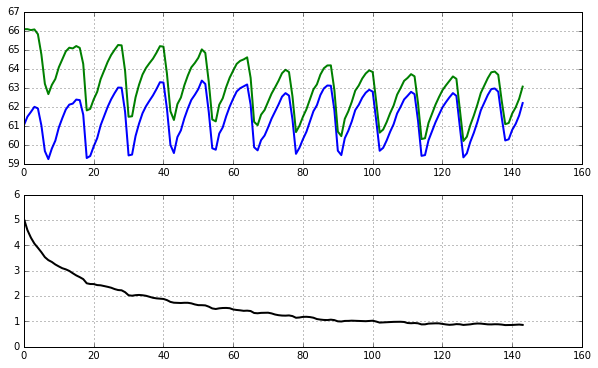

In [4]:
fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(np.nanmean(np.nanmean(Ba1, 1), 1), lw=2)
ax1.plot(np.nanmean(np.nanmean(Ba2, 1), 1), lw=2)
ax2.plot(np.nanmean(np.nanmean(Ba2, 1), 1)-np.nanmean(np.nanmean(Ba1, 1), 1), 'k-', lw=2)

# View the result by regions

In [5]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [6]:
rf_name=glob.glob('_data/Samples/STN-30p/runoff_id_modified.mat')
rf_obj=scipy.io.loadmat(rf_name[0])
rf_id=rf_obj['rf_id']
rf_lon=rf_obj['lon']
rf_lat=rf_obj['lat']
rf_id[rf_id==2]=0 # 0 is Central Arctic

In [7]:
Ba_temp = Ba1[0, :, :]
Class_interp = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='nearest')
Class_range = Nts.reporj_NEMOgrid(rf_lon, rf_lat, rf_id, nav_lon, nav_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan
Class_interp[np.isnan(Ba_temp)] = np.nan
Class_masked = np.ma.masked_where(np.isnan(Class_interp), Class_interp)

In [8]:
regions=["Central Arctic",    \
        "Arctic Archipelago", \
        "Baffin Bay",         \
        "Barents Sea",        \
        "Beaufort Sea",       \
        "Bering Strait",      \
        "Chukchi Sea",        \
        "East Siberian Sea",  \
        "Foxe Basin",         \
        "Hudson Bay",         \
        "Hudson Strait",      \
        "Kara Sea",           \
        "Laptev Sea",         \
        "Norwegian Sea",      \
        "Greenland Sea",\
        "South Greenland Sea"]

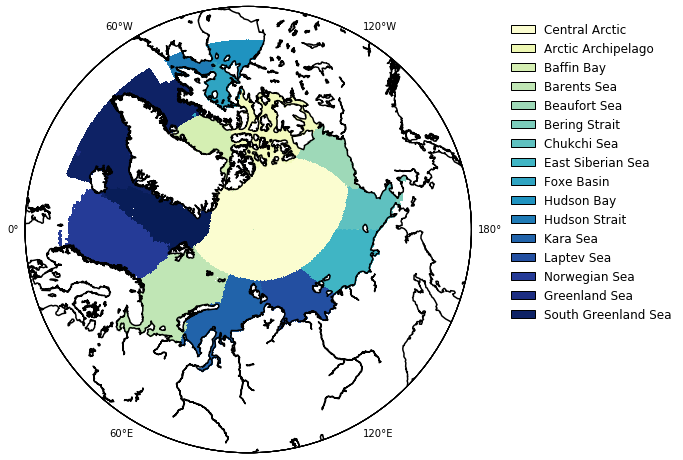

In [9]:
CMap=plt.cm.YlGnBu
var_name='Runoff Classification'
clev=np.array([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])-0.5
rf_id_masked=np.ma.masked_where(np.isnan(rf_id), rf_id)
#
fig, ax, proj = Nts.plot_Arctic_LandCover(nav_lon, nav_lat, 55, Class_masked, clev, regions, CMap, var_name)
#

fig.set_size_inches(8, 8)
fig.canvas.draw()

## Central Arctic

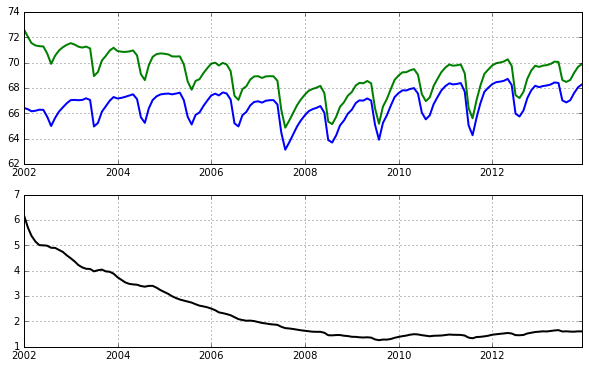

In [10]:
y1 = np.nanmean(Ba1[:, Class_interp==0], 1)
y2 = np.nanmean(Ba2[:, Class_interp==0], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

## CAA

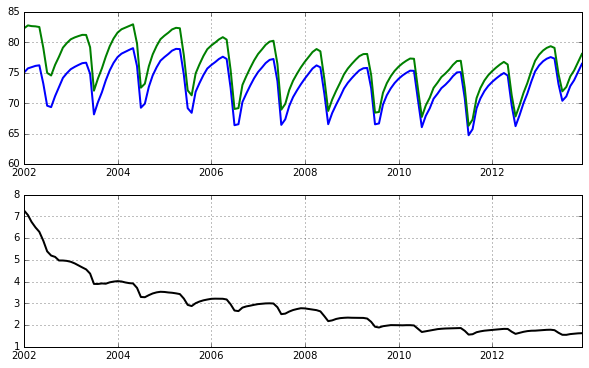

In [11]:
y1 = np.nanmean(Ba1[:, Class_interp==1], 1)
y2 = np.nanmean(Ba2[:, Class_interp==1], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

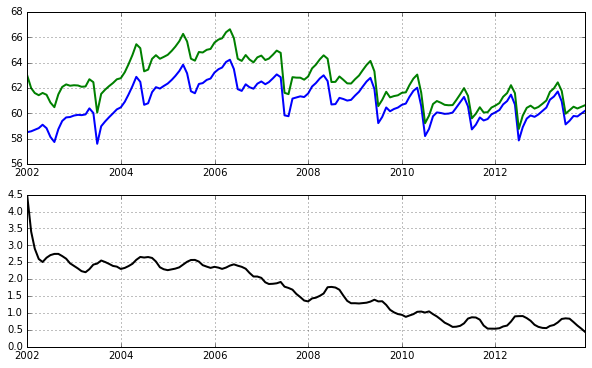

In [12]:
y1 = np.nanmean(Ba1[:, Class_interp==3], 1)
y2 = np.nanmean(Ba2[:, Class_interp==3], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

##Beaufort Sea

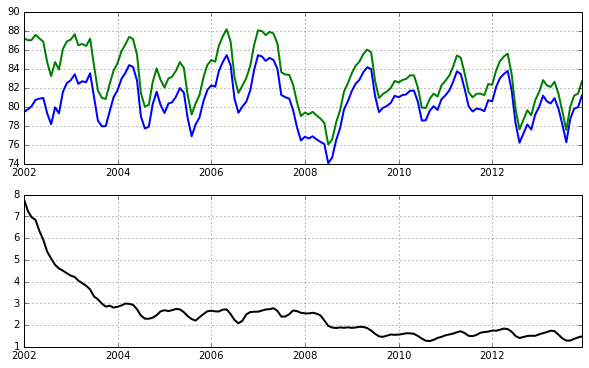

In [13]:
y1 = np.nanmean(Ba1[:, Class_interp==5], 1)
y2 = np.nanmean(Ba2[:, Class_interp==5], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

## Chukchi Sea

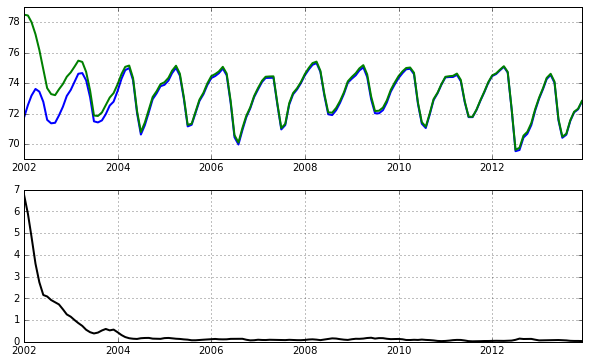

In [14]:
y1 = np.nanmean(Ba1[:, Class_interp==7], 1)
y2 = np.nanmean(Ba2[:, Class_interp==7], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

## East Siberian Sea (Kolyma)

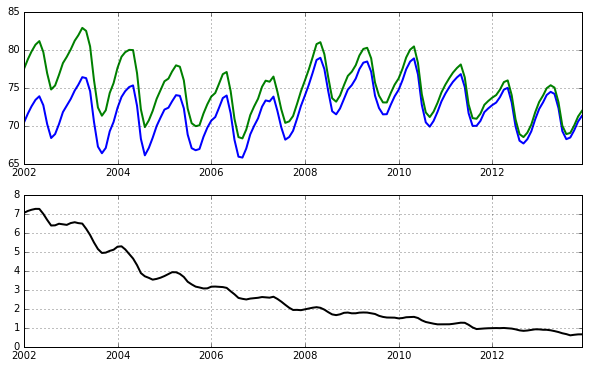

In [15]:
y1 = np.nanmean(Ba1[:, Class_interp==8], 1)
y2 = np.nanmean(Ba2[:, Class_interp==8], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

## Kara Sea (Lena)

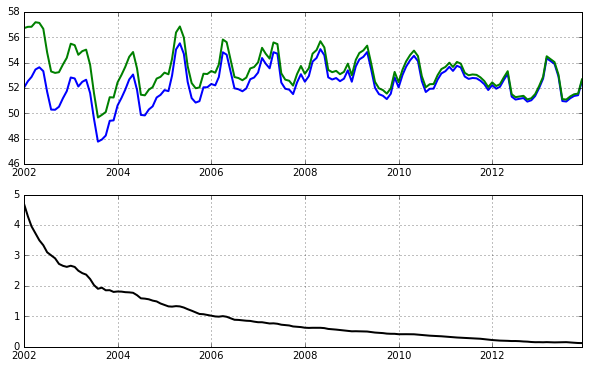

In [16]:
y1 = np.nanmean(Ba1[:, Class_interp==12], 1)
y2 = np.nanmean(Ba2[:, Class_interp==12], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

## Laptev Sea (Ob, Yenisey)

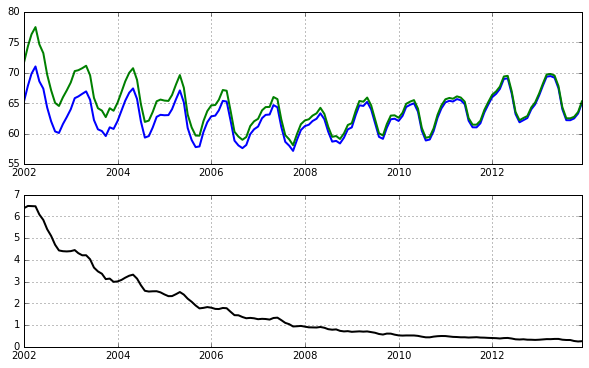

In [17]:
y1 = np.nanmean(Ba1[:, Class_interp==13], 1)
y2 = np.nanmean(Ba2[:, Class_interp==13], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

## South Greenland Sea

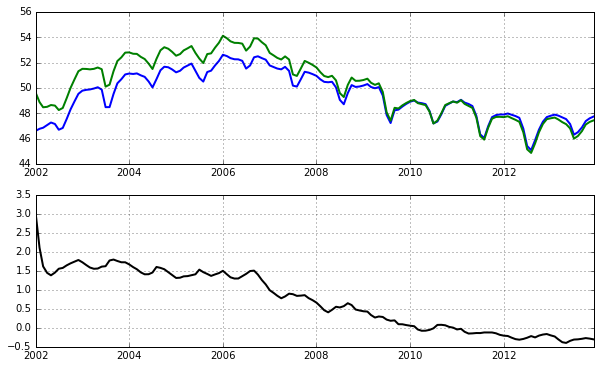

In [18]:
y1 = np.nanmean(Ba1[:, Class_interp==17], 1)
y2 = np.nanmean(Ba2[:, Class_interp==17], 1)

fig = plt.figure(figsize=(10, 6)); 
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
ax1.grid(); ax2.grid()
ax1.plot(date_list, y1, lw=2)
ax1.plot(date_list, y2, lw=2)
ax2.plot(date_list, y2-y1, 'k-', lw=2)

# Result in depth

In [19]:
lnum=[5, 10, 20, 30]
Ba_dep1 = np.squeeze(ptrc_obj1.variables['Ba'][:, lnum, :, :]); Ba_dep1[Ba_dep1==0]=np.nan
Ba_dep2 = np.squeeze(ptrc_obj2.variables['Ba'][:, lnum, :, :]); Ba_dep2[Ba_dep2==0]=np.nan

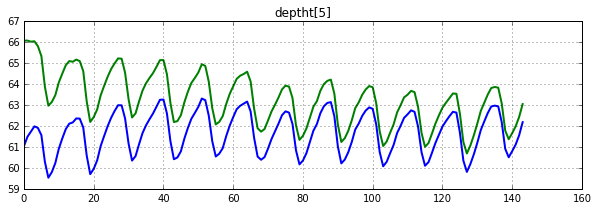

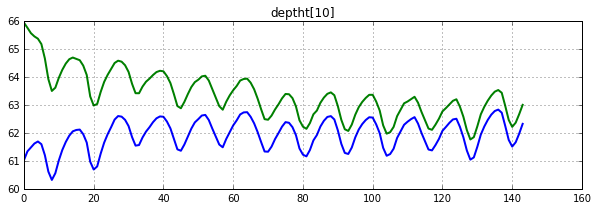

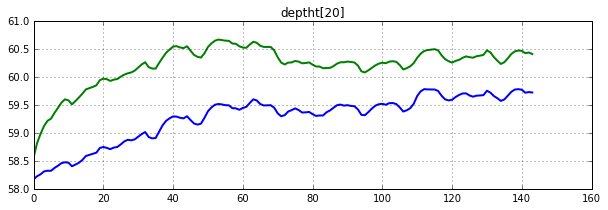

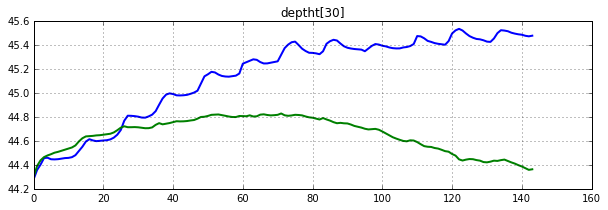

In [20]:
for i in range(4):
    fig = plt.figure(figsize=(10, 3)); 
    ax1 = fig.gca()
    #ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
    #ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=2)
    ax1.grid(); ax2.grid()
    ax1.plot(np.nanmean(np.nanmean(Ba_dep1[:, i, :, :], 1), 1), lw=2)
    ax1.plot(np.nanmean(np.nanmean(Ba_dep2[:, i, :, :], 1), 1), lw=2)
    #ax2.plot(np.nanmean(np.nanmean(Ba_dep1[:, i, :, :], 1), 1)-np.nanmean(np.nanmean(Ba_dep2[:, i, :, :], 1), 1), 'k-', lw=2)
    ax1.set_title('deptht['+str(lnum[i])+']')

# Conclusions

* 12 years are not long enough for the model to supress 10% increase for most of regions in the modelling domain.
* Based on the test, my 6-year spin-up was able to balance out up to 3 (nM)'s increase. 
* Grids close to Bering Strait (Chukchi Sea, East Siberian Sea) quickly went down, since Bering Strait inflow expand the influence of constant open boundary values.
* Grids close to the Atlantic Side did not chang too much. A possible reason is no strong Northward current can bring the open boundary values into the domain.
* When it goes deeper, two runs get harder to merge, but they are still trying to reduce the gap.